In [57]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [139]:
#Grab the necessary MNIST image data
data = MNIST('MNISTdata', 
             download=True,
            transform=transforms.Compose([   
                transforms.ToTensor()    #A ToTensor() transform is required since we cannot work with the PIL image format
            ])
            )

In [140]:
#Creater a DataLoader in order to efficiently access the data
loader = DataLoader(data, 
                    batch_size=128, 
                   )

In [141]:
sample = next(iter(loader)) #Grab a sample of 128 digits

In [142]:
sample[0][0].shape #View the shape of a single digit

torch.Size([1, 28, 28])

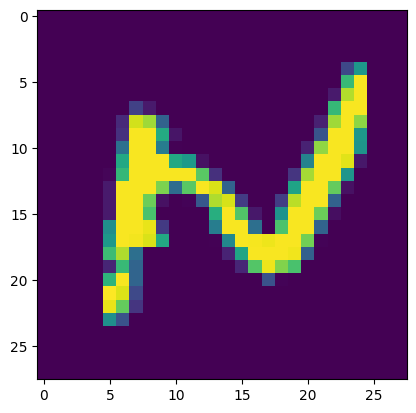

In [143]:
plt.imshow(sample[0][0].T) #Plot a single digit using Matplotlib

In [144]:
#Copy the flattened digits into the sampleVectors variable
sampleVectors = sample[0].flatten(start_dim=1).numpy().T  

In [145]:
#Calculate the covariance matrix of our data
CovMatrix = sampleVectors @ sampleVectors.T

In [148]:
#Verify that its shape is as expected (dimensions x dimensions)
CovMatrix.shape

(784, 784)

In [147]:
#Calculate the eigenvalues and eigenvectors of the Covariance matrix
eigdata = np.linalg.eig(CovMatrix)

In [149]:
#Copy the top 3, 10, and 100 eigenvectors into arrays
top3evecs = eigdata[1][:,:3].T
top10evecs = eigdata[1][:,:10].T
top100evecs = eigdata[1][:,:100].T

In [134]:
def project(v, basis):
    return basis @ v.T

def embed(lowerdim_coords):
    return basis.T @ lowerdim_coords

In [135]:
projected = project(sampleVectors[:,0])

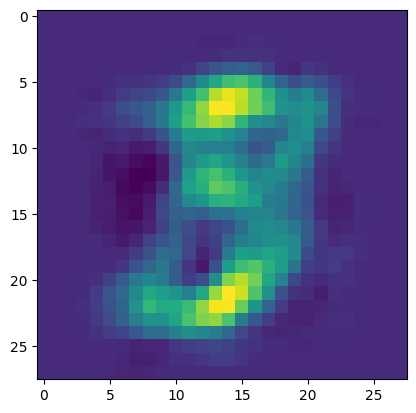

In [136]:
plt.imshow(embed(projected).reshape(28,28))

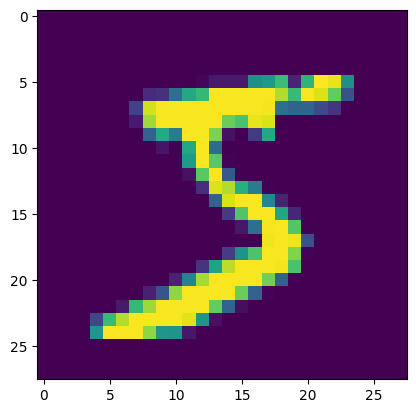

In [137]:
plt.imshow(sampleVectors[:,0].reshape(28,28))